<a href="https://colab.research.google.com/github/mharunturkmenoglu/GlobalAIHubSummerCamp22/blob/main/ML_Model_Denemesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model denemesi için;

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv ('insurance.csv')


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##Model Denemesi

In [8]:
x = df["bmi"]
y = df["charges"]

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [11]:
print((len(x_train)))
print((len(y_train)))
print((len(x_test)))
print((len(y_test)))

1070
1070
268
268


In [12]:
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(x_train.shape, y_train.shape)

(1070, 1) (1070, 1)


In [13]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [14]:
lm.fit(x_train,y_train)

LinearRegression()

In [15]:
#Modeli optimize edersek;
predictions=lm.predict(x_test)
predictions

array([[ 9199.10601015],
       [14499.70276735],
       [17114.66383423],
       [12703.07944544],
       [16322.36410842],
       [11319.34471303],
       [13969.64309163],
       [14462.50559712],
       [10471.24923188],
       [ 8032.97472357],
       [11990.75363561],
       [14298.83804813],
       [ 9515.28195707],
       [14499.70276735],
       [15117.1757931 ],
       [17735.85657701],
       [15567.26155283],
       [14685.68861848],
       [16344.68241056],
       [15485.42777834],
       [15935.51353807],
       [11460.69395989],
       [14994.42513135],
       [14004.98040334],
       [11375.14046837],
       [12132.10288247],
       [14146.3296502 ],
       [18405.40564108],
       [ 9870.51493273],
       [10188.55073816],
       [11496.0312716 ],
       [12061.42825904],
       [12838.84911676],
       [14298.83804813],
       [13792.95653306],
       [13616.26997448],
       [13969.64309163],
       [10506.58654359],
       [11743.39245361],
       [11248.6700896 ],


In [16]:
for i in range(len(x_test)):
  print(f"{i} : Actual Value: {y_test[i]} - Predicted Value:{predictions[i]}")

0 : Actual Value: [9193.8385] - Predicted Value:[9199.10601015]
1 : Actual Value: [7261.741] - Predicted Value:[14499.70276735]
2 : Actual Value: [6610.1097] - Predicted Value:[17114.66383423]
3 : Actual Value: [8547.6913] - Predicted Value:[12703.07944544]
4 : Actual Value: [14235.072] - Predicted Value:[16322.36410842]
5 : Actual Value: [11454.0215] - Predicted Value:[11319.34471303]
6 : Actual Value: [39125.33225] - Predicted Value:[13969.64309163]
7 : Actual Value: [1261.442] - Predicted Value:[14462.50559712]
8 : Actual Value: [6686.4313] - Predicted Value:[10471.24923188]
9 : Actual Value: [6640.54485] - Predicted Value:[8032.97472357]
10 : Actual Value: [9617.66245] - Predicted Value:[11990.75363561]
11 : Actual Value: [2498.4144] - Predicted Value:[14298.83804813]
12 : Actual Value: [2302.3] - Predicted Value:[9515.28195707]
13 : Actual Value: [39047.285] - Predicted Value:[14499.70276735]
14 : Actual Value: [8124.4084] - Predicted Value:[15117.1757931]
15 : Actual Value: [4536

In [17]:
import sklearn.metrics
r2 = sklearn.metrics.r2_score(y_test, predictions)
mae = sklearn.metrics.mean_absolute_error(y_test, predictions)
mse = sklearn.metrics.mean_squared_error(y_test, predictions)

print(f"R2: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

R2: 0.05297058078598471
MAE: 9466.433859618879
MSE: 145899689.27736494


In [18]:
x_predictions = lm.predict(x_train)

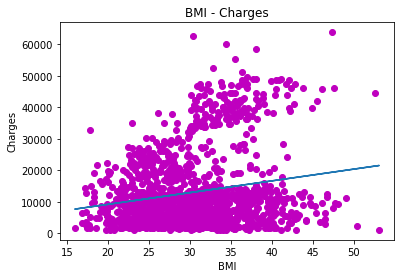

In [19]:
plt.scatter(x=df["bmi"], y=df["charges"], color="m")
plt.plot(x_train, x_predictions)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI - Charges")
plt.show()